# LIMITS OF A FUNCTION
The concept of `limits of a function` is fundamental to the study of Calculus. Limits allow mathematicians to find the `derivatives` of a function, a useful concept that allows companies and individuals to maximize profit, among other things. The limits of a function give information about the behaviour of a function as the input values tend toward some point. However, for most students this concept as introduced can be very intimidating and confusing since they may have.

### WHAT IS A LIMIT OF A FUNCTION?
Let $A, B \subseteq \mathbb{R}$ and consider a function $$f:A \to B$$ 
The limit $L,$ of $f$ as $x\to a \in A,$ is a value that describes how the function's output values behave as the input values approach $a$ from either the left or the right. In simpler terms it tells us the value that $f(x)$ gets arbitrarily close to as $x$ approaches $a.$



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from typing import Union

In [ ]:
class Limit:
    """This class provides functionality to visualize, analyze, and verify 
    limits of a function using various methods. 
    
    Args:
    fun: The function with which you want to evaluate the limit at some point
    limit_point: The point at which you want to evaluate the limit"""
    
    def __init__(self, fun, limit_point:Union[float, int]):
        self.fun = fun
        self.limit = limit_point
        self.x = np.linspace(self.limit-2, self.limit+2, 101)
        self.y = self.fun(self.x)
        self.left_x = np.linspace(self.limit-5, self.limit-(10**(-1.5)))
        self.left_y = self.fun(self.left_x)
        self.right_x = np.linspace(self.limit+5, self.limit+(10**(-1.5)))
        self.right_y= self.fun(self.right_x)
    
    def draw(self):
        """The draw method plots the graph of the function"""
        plt.plot(self.x, self.y)
        plt.grid()
        plt.show()

    def anim(self):
        """The anim method animates the values in the domain getting closer to the limit point."""
        fig, ax = plt.subplots()
        leftline, = ax.plot([], [], 'o', markersize=5, color='red')
        rightline, = ax.plot([], [], 'o', markersize=5, color='blue')


        def update_data(i):
            """The update_data is a helper method that updates the data for each frame of the animation
            
            Args:
            i: This is the value of each frame"""
            try:
                leftline.set_data(self.left_x[i:i+1], self.left_y[i:i+1])
                rightline.set_data(self.right_x[i:i+1], self.right_y[i:i+1])
            except IndexError:
                pass
            return leftline, rightline

        self.draw()
        ani = FuncAnimation(
                    fig=fig, 
                    func = update_data, 
                    frames=len(self.left_x), 
                    interval=25, 
                    )
        
        ani.save("function.mp4")
        
        plt.show()

    def is_defined(self):
        """The is_defined method checks if the function is defined at the specified limit point."""
        try:
            self.fun(self.limit)
            return self.fun(self.limit)
        except:
            return False

    def solve_left(self):
        """The solve_left method evaluates the limit for values to the left of the specified limit point."""
        
        left_x = [self.limit-(10**(-n)) for n in range(1, 1000)]
        left_x = np.array(left_x)
        left_y = self.fun(left_x)
        left_y = left_y[~np.isnan(left_y)]
        is_converge = [current - previous for current, previous in zip(left_y, left_y[1:])]
        tolerance = [(current - previous)<0.01 for current, previous in zip(is_converge, is_converge[1:])]
        if all(tolerance[5:]):
            return left_y
        return None
    
    def solve_right(self):
        """The solve_left method evaluates the limit for values to the right of the specified limit point."""

        right_x = [self.limit+(10**(-n)) for n in range(1,1000)]
        right_x = np.array(right_x)
        right_y = self.fun(right_x)
        right_y = right_y[~np.isnan(right_y)]
        is_converge = [future - current for future, current in zip(right_y[1:], right_y)]
        tolerance = [(future-current)<0.01 for future, current in zip(is_converge[1:], is_converge)]
        if all(tolerance[5:]):
            return right_y
        return None

    def guess(self):
        """The method checks that the left and right limit values are equal and uses that as a guess for the `solve_epsilon`"""

        if self.solve_right() is not None and self.solve_left() is not None\
              and self.solve_right()[-1] == self.solve_left()[-1]:
            return self.solve_left()[-1]
        return None

    def get_delta(self, epsilon:Union[float, int], limit_value:Union[float, int]):
        """The get_delta method gets a value of delta for each value of epsilon that is specified.
        
        Args:
        epsilon: float|int
        The specified epsilon value for which we want to get a delta value
        limit_value: float|int
        The guess for the limit of the function"""

        domain_codomain = list(zip(self.x, self.y))
        if epsilon<=0:
            raise ValueError('`epsilon` value should be a nonzero positive number')
        for _, y in domain_codomain.copy():
            if abs(y-limit_value)>epsilon:
                domain_codomain.remove((_,y))
        domain_difference = [abs(x-self.limit)+epsilon if abs(x-self.limit)==0 else abs(x-self.limit) for x,_ in domain_codomain ]
        try:
            return min(domain_difference)
        except:
            return None
        
    def solve_epsilon(self):
        """The solve_epsilon method checks that the initial guess from the guess method is indeed the limit of the function at the specified point `self.limit`"""

        epsilon_values = np.random.random(10)
        if self.guess() != None and self.get_delta(epsilon_values[0], self.guess()):
            delta_values = [self.get_delta(i, self.guess())for i in epsilon_values]
            return self.guess() if len(delta_values)==len(epsilon_values) else None
    

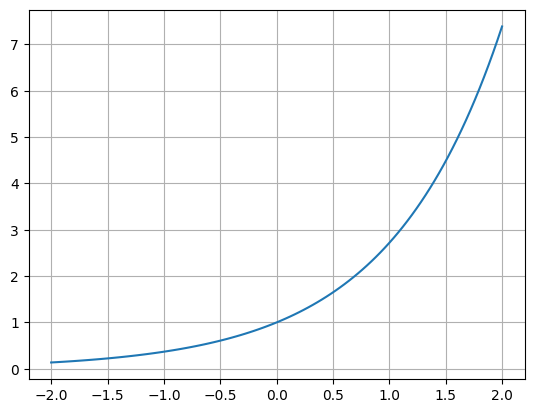

In [9]:
f = lambda x: np.exp(x)
test_limit = Limit(f, 0)

test_limit.anim()